### Importer les Librairies

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt

from extractFeatures import *

### Chargement du Dataset

In [2]:
file_path = r'dataset/df77.csv'

df = pd.read_csv(file_path,
                  on_bad_lines='skip',
                  encoding="latin-1")

df.head(10)

,Unnamed: 0,password,length,upper,lower,digit,spe,strength
0,0,m30thsn3,8,0,5,3,0,moyen
1,1,neutronboy,10,0,10,0,0,faible
2,2,20black,7,0,5,2,0,faible
3,3,2500967,7,0,0,7,0,faible
4,4,sashas13,8,0,6,2,0,moyen
5,5,roweenakopara,13,0,13,0,0,moyen
6,6,073371,6,0,0,6,0,faible
7,7,#1PRECIOUS,10,8,0,1,1,fort
8,8,aezscp83h,9,0,7,2,0,moyen
9,9,maria2009,9,0,5,4,0,moyen


In [3]:
df.shape

(6956, 8)

In [4]:
df.isnull().sum()

Unnamed: 0    0
password      0
length        0
upper         0
lower         0
digit         0
spe           0
strength      0
dtype: int64

In [5]:
df["strength"].value_counts()

strength
moyen     2961
faible    2093
fort      1902
Name: count, dtype: int64

<Axes: xlabel='strength', ylabel='count'>

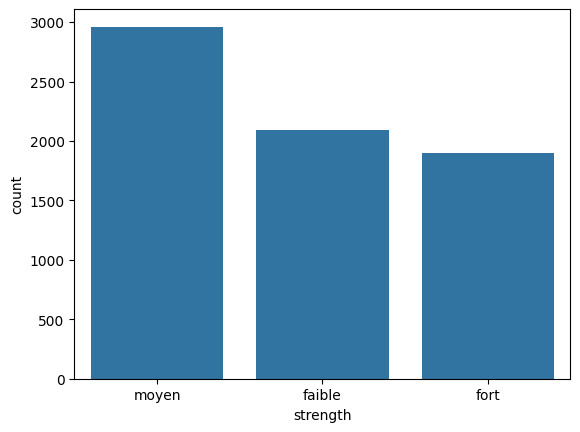

In [6]:
sns.countplot(x = 'strength', data = df)

### Application du Modèle Supervisé

In [7]:
# Convertir les labels en valeurs numériques
# label_mapping = {'faible': 0, 'moyen': 1, 'fort': 2}
# df['strength'] = df['strength'].map(label_mapping)

# Separer Caracteristique et Labels
X = df[['length', 'upper', 'lower', 'digit', 'spe']]
y = df['strength']

# Diviser les donnees entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# y_train_encoded = encoder.fit_transform(y_train)
# knn.fit(X_train_scaled, y_train_encoded)
# y_pred_encoded = knn.predict(X_test_scaled)
# y_pred = encoder.inverse_transform(y_pred_encoded)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5564, 5)
(1392, 5)
(5564,)
(1392,)


#### Modele KNN

In [10]:
# Définir la grille des hyperparamètres
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialiser le modèle KNN
knn = KNeighborsClassifier()

# Appliquer GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [11]:
# Initialiser et entrainer le modele knn
knn = grid_search.best_estimator_
knn.fit(X_train_scaled, y_train)

# Prediction et Evaluation du modele
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9827586206896551

Classification Report:
              precision    recall  f1-score   support

      faible       1.00      0.96      0.98       416
        fort       0.99      0.99      0.99       377
       moyen       0.97      0.99      0.98       599

    accuracy                           0.98      1392
   macro avg       0.99      0.98      0.98      1392
weighted avg       0.98      0.98      0.98      1392



In [12]:
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score:", balanced_acc)

Balanced Accuracy Score: 0.9816616609025653


In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [14]:
# X_train_scaled_resampled = scaler.fit_transform(X_resampled)

# knn.fit(X_train_scaled_resampled, y_resampled)

# # Prediction et Evaluation du modele
# y_pred = knn.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# balanced_acc = balanced_accuracy_score(y_test, y_pred)
# print("Balanced Accuracy Score:", balanced_acc)

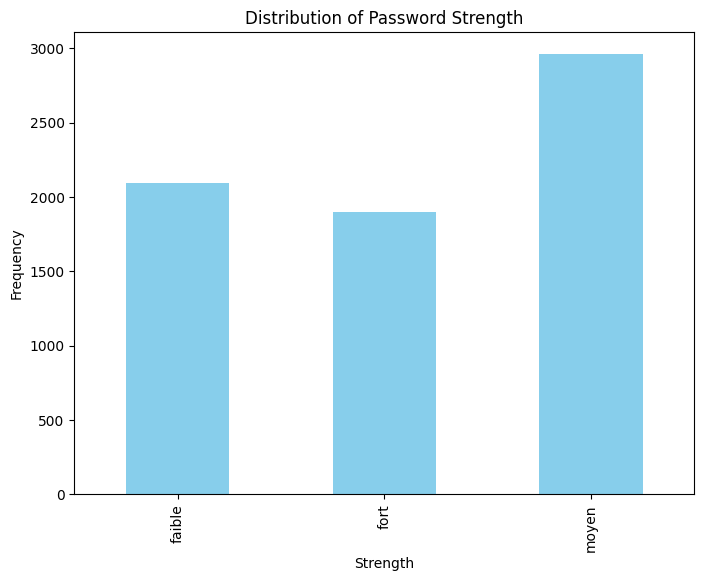

In [15]:
plt.figure(figsize=(8, 6))
df['strength'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Password Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

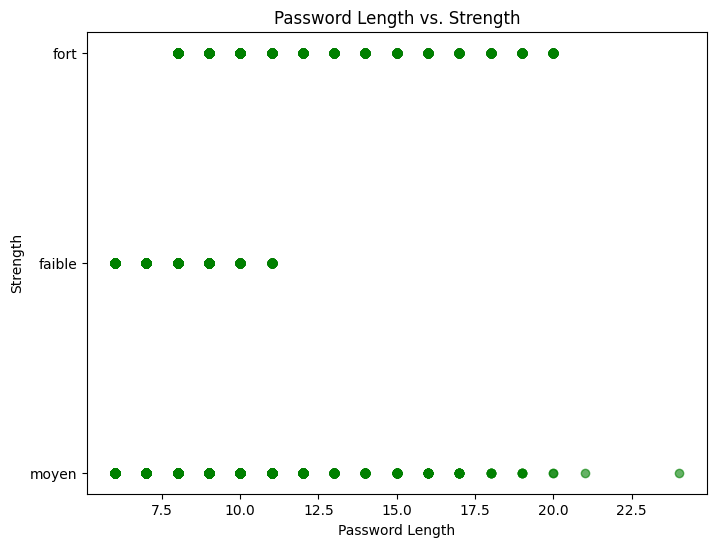

In [16]:
# Scatter plot to show the relationship between length and strength
plt.figure(figsize=(8, 6))
plt.scatter(df['length'], df['strength'], c='green', alpha=0.6)
plt.title('Password Length vs. Strength')
plt.xlabel('Password Length')
plt.ylabel('Strength')
plt.show()

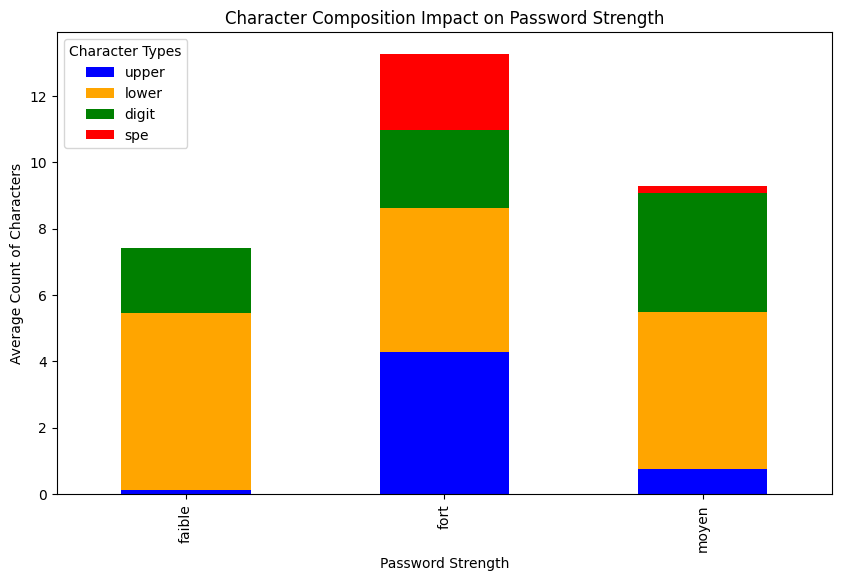

In [17]:
# Prepare data for a stacked bar chart
df_grouped = df.groupby('strength').mean(numeric_only='true')[['upper', 'lower', 'digit', 'spe']]

# Plot the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange', 'green', 'red'])
plt.title('Character Composition Impact on Password Strength')
plt.xlabel('Password Strength')
plt.ylabel('Average Count of Characters')
plt.legend(title='Character Types', loc='upper left')
plt.show()


In [18]:
def test_input(ipt):
    user_inp = ipt
    user_inp_f = np.array(extract_features(user_inp)).reshape(1, -1)
    #print(user_inp_f)
    df_inp = pd.DataFrame(user_inp_f, columns=['password', 'length', 'upper', 'lower', 'digit', 'spe', 'strength'])
    inp_x = df_inp[['length', 'upper', 'lower', 'digit', 'spe']]
    # inp_y = df_inp['strength']
    inp_pred = scaler.transform(inp_x)

    #print(df_inp)

    strength = knn.predict(inp_pred)
    
    return np.array_str(strength) 
    
    # if strength == 2 : 
    #     return 'Fort'
    # elif strength == 1 : 
    #     return 'Moyen'
    # else : 
    #     return 'Faible'

In [19]:
print(test_input('Hu895y#iUç$'))
print(type(test_input('Hu895y#iUç$')))

['fort']
<class 'str'>


In [20]:
extract_features('Hu895y#iUç$')

['Hu895y#iUç$', 11, 2, 4, 3, 2, 'fort']